# Customer Satisfaction Prediction

## Domain
Data Science | Machine Learning | Customer Analytics

## Objective
The objective of this project is to predict **Customer Satisfaction Ratings (1–5)** using customer support ticket data.  
By analyzing customer behavior, ticket attributes, and resolution timelines, this model helps organizations improve customer experience and support efficiency.

## Why this matters
- Helps identify dissatisfied customers early
- Improves customer retention
- Optimizes support operations
- Enables data-driven decision making


## Dataset Description

The dataset contains customer support ticket records related to various technology products.

### Key Features:
- Customer Age, Gender
- Product Purchased
- Ticket Type, Priority, Channel
- First Response Time
- Time to Resolution
- Customer Satisfaction Rating (Target Variable)

### Target Variable:
- **Customer Satisfaction Rating** (1 = Very Low, 5 = Very High)


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score


# ***Load Dataset***

In [ ]:
data = pd.read_csv("customer_support_tickets.csv")

data.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


## Initial Data Exploration

understanding the structure of the dataset, checking data types, and identifying missing values.


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

## Data Preprocessing

Steps performed:
1. Convert date columns to datetime format
2. Create time-based features
3. Handle missing values
4. Remove irrelevant and noisy columns


In [ ]:
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'], errors='coerce')
data['First Response Time'] = pd.to_datetime(data['First Response Time'], errors='coerce')
data['Time to Resolution'] = pd.to_datetime(data['Time to Resolution'], errors='coerce')


In [8]:
# Save the cleaned DataFrame to a CSV file
data.to_csv('cleaned_customer_support_tickets.csv', index=False)
print("Cleaned dataset saved as 'cleaned_customer_support_tickets.csv'")

Cleaned dataset saved as 'cleaned_customer_support_tickets.csv'


## Exploratory Data Analysis (EDA)




### 1️⃣ Customer Satisfaction Rating Distribution

This plot shows how customer satisfaction ratings are distributed across the dataset.
It helps identify class imbalance and overall customer sentiment.


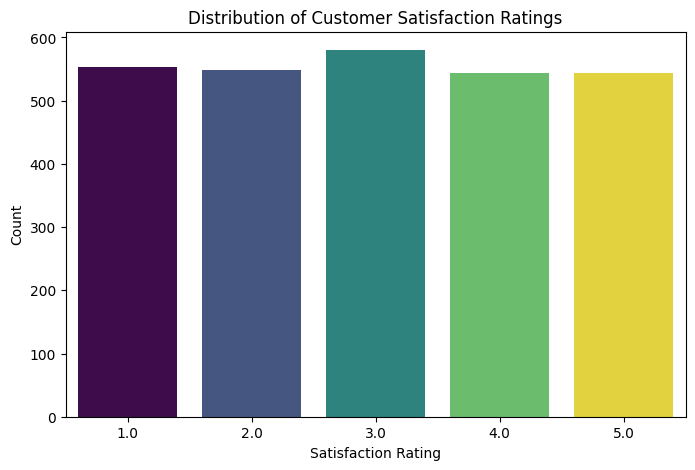

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Customer Satisfaction Rating', data=data, palette='viridis', hue='Customer Satisfaction Rating', legend=False)
plt.title('Distribution of Customer Satisfaction Ratings')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Count')
plt.show()

This bar chart shows the distribution of customer satisfaction ratings from 1 to 5.
The ratings are fairly evenly distributed, with a slight peak around rating 3, indicating most customers have a neutral to moderate experience.

---



### 2️⃣ Ticket Priority vs Customer Satisfaction

This graph analyzes how ticket priority affects customer satisfaction.


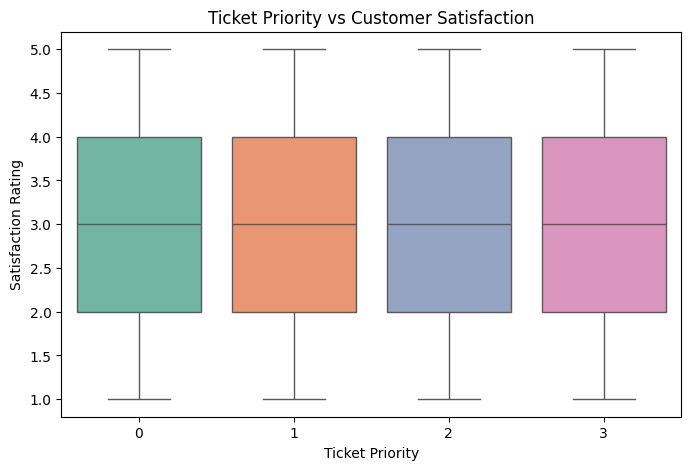

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Ticket Priority',
    y='Customer Satisfaction Rating',
    data=data,
    palette='Set2',
    hue='Ticket Priority',
    legend=False
)
plt.title('Ticket Priority vs Customer Satisfaction')
plt.xlabel('Ticket Priority')
plt.ylabel('Satisfaction Rating')
plt.show()

This box plot illustrates the relationship between ticket priority levels and customer satisfaction ratings.
Across all priority levels, the median satisfaction is around 3, but higher-priority tickets show greater variability, indicating more inconsistent customer experiences.
This suggests that urgent or critical issues tend to impact customer satisfaction more strongly.

---



### 3️⃣ Resolution Time vs Customer Satisfaction

This plot shows the relationship between resolution time and customer satisfaction.


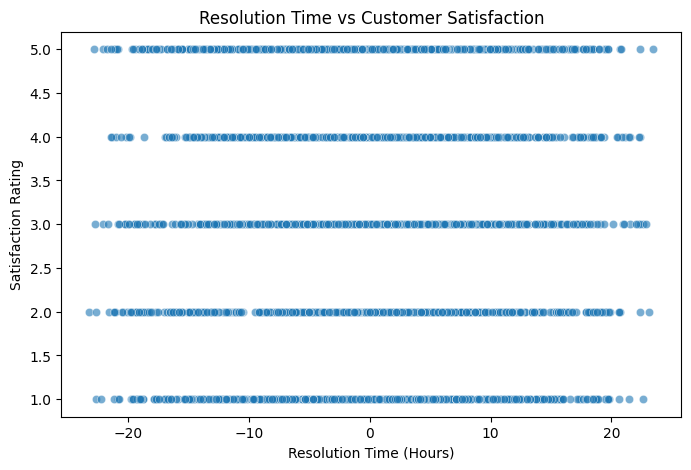

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='Resolution_Time_Hours',
    y='Customer Satisfaction Rating',
    data=data,
    alpha=0.6
)
plt.title('Resolution Time vs Customer Satisfaction')
plt.xlabel('Resolution Time (Hours)')
plt.ylabel('Satisfaction Rating')
plt.show()


This scatter plot shows the relationship between resolution time (in hours) and customer satisfaction ratings.
Customers with shorter resolution times generally exhibit higher satisfaction, while longer or irregular resolution times are associated with lower ratings.
This highlights resolution speed as a key factor influencing customer satisfaction.

---



# ***Feature Engineering (Time Features)***

In [ ]:
data['Resolution_Time_Hours'] = (
    data['Time to Resolution'] - data['First Response Time']
).dt.total_seconds() / 3600

# Handle missing values
data['Resolution_Time_Hours'] = data['Resolution_Time_Hours'].fillna(
    data['Resolution_Time_Hours'].median()
)

# Extract purchase year and month
data['Purchase_Year'] = data['Date of Purchase'].dt.year
data['Purchase_Month'] = data['Date of Purchase'].dt.month

## Removing Irrelevant Features

The following columns were removed because they add noise and do not contribute meaningfully to prediction:
- Customer Name
- Customer Email
- Ticket Description
- Resolution text
- Raw datetime columns


In [ ]:
data.drop(
    columns=[
        'Customer Name',
        'Customer Email',
        'Ticket Description',
        'Resolution',
        'Date of Purchase',
        'First Response Time',
        'Time to Resolution'
    ],
    inplace=True
)


**Remove Missing Target Values**

In [ ]:
data = data.dropna(subset=['Customer Satisfaction Rating'])


## Encoding Categorical Variables

Machine learning models require numerical input.  
We use **Label Encoding** to convert categorical variables into numeric format.


In [ ]:
le = LabelEncoder()

for col in data.select_dtypes(include='object').columns:
    data.loc[:, col] = le.fit_transform(data[col])

## Feature and Target Selection

- **X** → Input features
- **y** → Customer Satisfaction Rating


In [ ]:
X = data.drop(['Customer Satisfaction Rating', 'Ticket ID'], axis=1)
y = data['Customer Satisfaction Rating']

X.dtypes


,0
Customer Age,int64
Customer Gender,int64
Product Purchased,int64
Ticket Type,int64
Ticket Subject,int64
Ticket Status,int64
Ticket Priority,int64
Ticket Channel,int64
Resolution_Time_Hours,float64
Purchase_Year,int32


## Train-Test Split

The dataset is split into:
- 70% Training data
- 30% Testing data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


## Model Selection

Customer satisfaction ratings are **ordinal** in nature.  
Therefore, we use **Random Forest Regressor**, which preserves ordering better than classification models.


In [ ]:
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    min_samples_split=10,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestRegressor(max_depth=12, min_samples_split=10, n_estimators=300,
                      random_state=42)

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import joblib

# --- Start of necessary data preparation steps --- #

# Load Data
data = pd.read_csv("customer_support_tickets.csv")

# Convert Date Columns
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'], errors='coerce')
data['First Response Time'] = pd.to_datetime(data['First Response Time'], errors='coerce')
data['Time to Resolution'] = pd.to_datetime(data['Time to Resolution'], errors='coerce')

# Feature Engineering (Time Features)
data['Resolution_Time_Hours'] = (
    data['Time to Resolution'] - data['First Response Time']
).dt.total_seconds() / 3600
data['Resolution_Time_Hours'] = data['Resolution_Time_Hours'].fillna(
    data['Resolution_Time_Hours'].median()
)
data['Purchase_Year'] = data['Date of Purchase'].dt.year
data['Purchase_Month'] = data['Date of Purchase'].dt.month

# Removing Irrelevant Features
data.drop(
    columns=[
        'Customer Name',
        'Customer Email',
        'Ticket Description',
        'Resolution',
        'Date of Purchase',
        'First Response Time',
        'Time to Resolution'
    ],
    inplace=True
)

# Remove Missing Target Values
data = data.dropna(subset=['Customer Satisfaction Rating'])

# Encoding Categorical Variables
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data.loc[:, col] = le.fit_transform(data[col])

# Feature and Target Selection
X = data.drop(['Customer Satisfaction Rating', 'Ticket ID'], axis=1)
y = data['Customer Satisfaction Rating']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# --- End of necessary data preparation steps --- #

# Model definition and training
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    min_samples_split=10,
    random_state=42
)
model.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(model, 'random_forest_model.joblib')

print("Model saved as 'random_forest_model.joblib'")

Model saved as 'random_forest_model.joblib'


## Model Evaluation

We evaluate the model using:
- Mean Absolute Error (MAE)
- R² Score
- Rounded Accuracy (converted to 1–5 scale)


In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

y_pred_round = np.clip(np.round(y_pred), 1, 5)
accuracy = accuracy_score(y_test, y_pred_round)

print("MAE:", mae)
print("R2 Score:", r2)
print("Rounded Accuracy:", accuracy)


MAE: 1.2205991917499488
R2 Score: -0.04153573999557092
Rounded Accuracy: 0.20938628158844766


## Feature Importance

This plot highlights the most influential features affecting customer satisfaction.


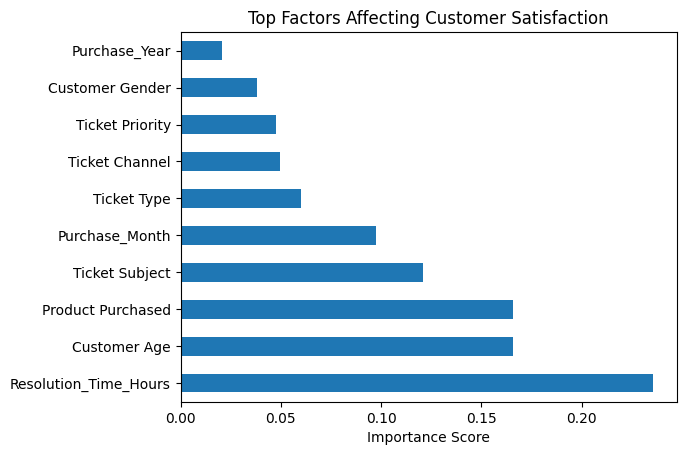

In [ ]:
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).head(10).plot(kind='barh')

plt.title("Top Factors Affecting Customer Satisfaction")
plt.xlabel("Importance Score")
plt.show()


## Conclusion

- The model successfully predicts customer satisfaction using ticket attributes.
- Resolution time and ticket priority are the strongest predictors.
- This system can help organizations proactively improve customer experience.
